# We are going to be looking at Play vs. sleep in white cats and in black cats.

# Does the breed affect the play vs. sleep time? What's the relationship?

In [1]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.tail(10)

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
715,Angora,3.25,39.0,male,False,40.0,4.5,black,bicolor,blue,FALSE,wet,12.0,16.0,USA,47.606210,-122.332070
716,Angora,3.42,41.0,male,True,41.0,4.4,white,solid,amber,FALSE,dry,24.0,17.0,USA,45.523450,-122.676210
717,Angora,3.50,42.0,male,True,39.0,4.8,black,solid,blue,FALSE,wet,15.0,16.0,USA,45.523450,-122.676210
718,Angora,3.58,43.0,female,True,34.0,3.3,white,solid,blue,FALSE,wet,20.0,14.0,USA,41.881832,-87.623177
719,Angora,3.67,44.0,male,False,39.0,4.5,white,solid,amber,FALSE,wet,23.0,14.0,USA,47.606210,-122.332070
720,Angora,3.67,44.0,male,False,37.0,4.6,white,solid,amber,FALSE,wet,32.0,14.0,France,43.611660,3.877710
721,Angora,3.75,45.0,male,True,43.0,3.9,white,solid,blue,FALSE,wet,38.0,14.0,USA,39.290380,-76.612190
722,Angora,3.83,46.0,male,False,37.0,4.1,white,solid,green,FALSE,wet,38.0,16.0,USA,38.895110,-77.036370
723,Angora,3.83,46.0,male,True,40.0,4.8,black,bicolor,amber,TRUE,wet,11.0,15.0,USA,40.714270,-74.005970
724,Angora,4.17,50.0,female,True,35.0,2.8,white,solid,amber,TRUE,dry,28.0,14.0,USA,45.523450,-122.676210


In [4]:
df['Fur_colour_dominant'].value_counts()


Fur_colour_dominant
seal               219
white              148
black              142
brown/chocolate    107
red/cream          105
lilac                4
Name: count, dtype: int64

# I learned through value counts you can discover how many cunts are for each value.....

In [5]:
df.rename(columns={'Owner_play_time_minutes': 'Play_Time', 'Sleep_time_hours': 'Sleep'}, inplace=True)


In [26]:
breed_df = df[df['Fur_colour_dominant'].isin(['black', 'white', 'seal','brown/chocolate','red/cream'])]

In [28]:
breed_df['Fur_colour_dominant'].value_counts()

Fur_colour_dominant
seal               219
white              148
black              142
brown/chocolate    107
red/cream          105
Name: count, dtype: int64

In [7]:
breed_group = breed_df.groupby('Fur_colour_dominant')[['Play_Time', 'Sleep']].mean()

breed_group

,Play_Time,Sleep
Fur_colour_dominant,,
black,22.711268,15.633803
brown/chocolate,20.934579,15.663551
red/cream,23.590476,16.333333
seal,19.858447,16.232877
white,25.810811,15.337838


In [12]:
# Assuming your DataFrame is df, breed column is 'breed' and continuous variables are 'play_time' and 'sleep'
# Melt your data to long form for easier plotting
df_melted = df.melt(id_vars='Fur_colour_dominant', value_vars=['Play_Time', 'Sleep'], var_name='Fur Color', value_name='value')

# I need to come back to this, they need to be two barcharts on two different graphs. since they have different units. One is in minutes one is in minutes one is in hours...

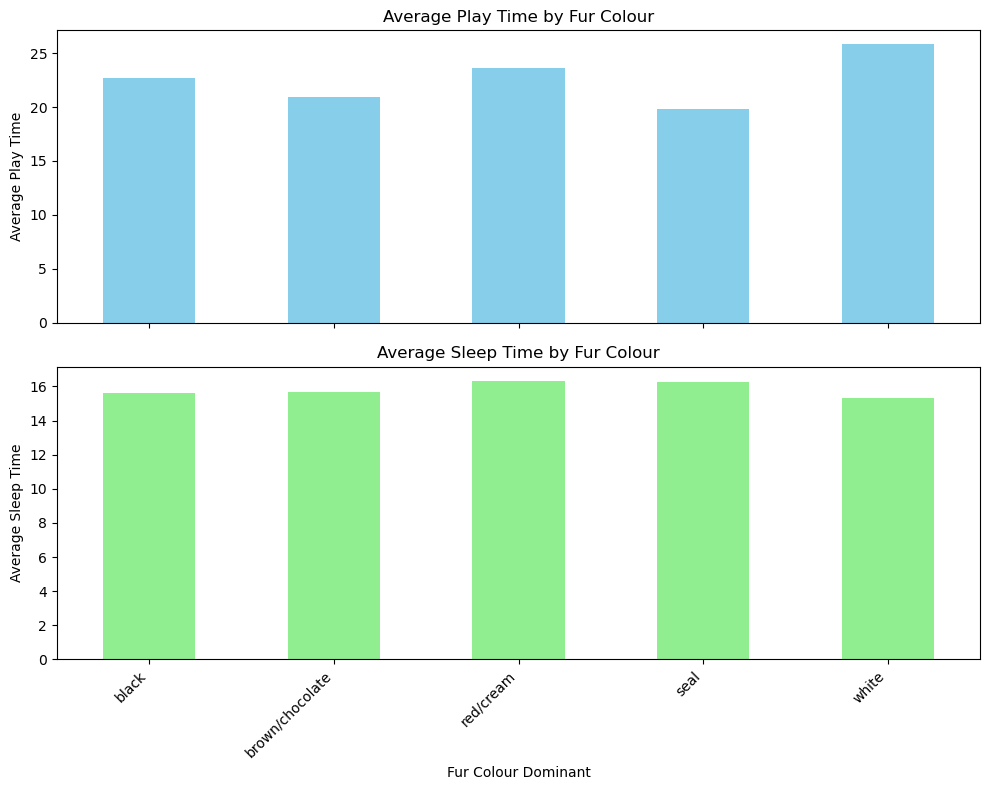

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Play_Time
breed_group['Play_Time'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_ylabel('Average Play Time')
ax1.set_title('Average Play Time by Fur Colour')

# Plot Sleep
breed_group['Sleep'].plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_ylabel('Average Sleep Time')
ax2.set_title('Average Sleep Time by Fur Colour')

# X-axis label only on bottom plot since they share x-axis
ax2.set_xlabel('Fur Colour Dominant')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



/var/folders/2z/6t6dl78d7b96q7xq1y4dzzw00000gn/T/ipykernel_2941/1789458728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fur_colour_dominant', y='Play_Time', data=breed_df, ax=ax3, palette='pastel')
/var/folders/2z/6t6dl78d7b96q7xq1y4dzzw00000gn/T/ipykernel_2941/1789458728.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fur_colour_dominant', y='Sleep', data=breed_df, ax=ax4, palette='pastel')


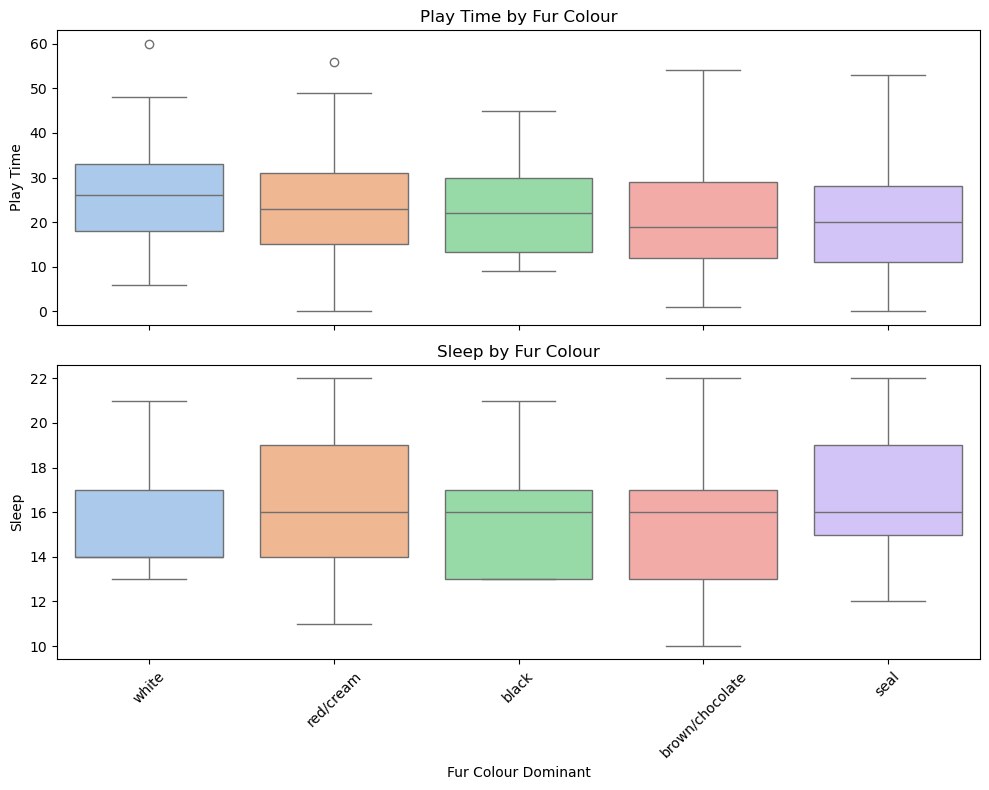

In [16]:
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

sns.boxplot(x='Fur_colour_dominant', y='Play_Time', data=breed_df, ax=ax3, palette='pastel')
ax3.set_title('Play Time by Fur Colour')
ax3.set_ylabel('Play Time')

sns.boxplot(x='Fur_colour_dominant', y='Sleep', data=breed_df, ax=ax4, palette='pastel')
ax4.set_title('Sleep by Fur Colour')
ax4.set_ylabel('Sleep')
ax4.set_xlabel('Fur Colour Dominant')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Making sure there aren't any statistical differnences between the two.

In [18]:
import scipy.stats as stats

# Extract groups for Play_Time based on Fur_colour_dominant
groups_play = [breed_df['Play_Time'].values for name, group in breed_df.groupby('Fur_colour_dominant')]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups_play)

print(f"ANOVA result for Play Time by Fur Colour: F = {f_stat:.3f}, p = {p_val:.4f}")


ANOVA result for Play Time by Fur Colour: F = -0.000, p = nan


In [19]:
for name, group in breed_df.groupby('Fur_colour_dominant'):
    print(f"{name}: size={len(group)}, variance={group['Play_Time'].var()}")


black: size=142, variance=88.50469483568072
brown/chocolate: size=107, variance=133.43907600070534
red/cream: size=105, variance=129.1095238095238
seal: size=219, variance=111.12207280800976
white: size=148, variance=98.03199117484832


In [20]:
groups_play = [group['Play_Time'].dropna().values for name, group in breed_df.groupby('Fur_colour_dominant')]

# Got Error so checking variances and such

In [23]:
h_stat, p_val_kruskal = stats.kruskal(*groups_play)
print(f"Kruskal-Wallis test for Play Time: H = {h_stat:.3f}, p = {p_val_kruskal:.4f}")

Kruskal-Wallis test for Play Time: H = 0.000, p = 1.0000


# This confirms that the difference between the averages for fur color are not significantly significant. 

In [24]:
groups_sleep = [group['Sleep'].dropna().values for name, group in breed_df.groupby('Fur_colour_dominant')]
h_stat_sleep, p_val_sleep = stats.kruskal(*groups_sleep)
print(f"Kruskal-Wallis test for Sleep: H = {h_stat_sleep:.3f}, p = {p_val_sleep:.4f}")

Kruskal-Wallis test for Sleep: H = 14.016, p = 0.0072


# This confirms that the diffrences in sleep time means are statistcally significant.